In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
path = 'data'
num_links = 128

num_pasta = []
lista_textos = []
textos = []
metaforico = []

In [3]:
for x in range(2, num_links + 1):
    lista_pasta = os.listdir(path + f'/pasta{x}')
    for y in lista_pasta:
        lista_textos.append(y)
        print('pasta ', x)
        with open(path + '/' + f'/pasta{x}' + '/' + y,'r') as file:
            data = file.read().replace('\n', '')
            textos.append(data)
            if x < 63:
                metaforico.append(0)
            else:
                metaforico.append(1)

pasta  2
pasta  3
pasta  4
pasta  5
pasta  5
pasta  5
pasta  5
pasta  5
pasta  5
pasta  6
pasta  6
pasta  6
pasta  6
pasta  6
pasta  6
pasta  6
pasta  7
pasta  8
pasta  8
pasta  9
pasta  9
pasta  9
pasta  10
pasta  11
pasta  12
pasta  12
pasta  13
pasta  14
pasta  15
pasta  16
pasta  16
pasta  16
pasta  16
pasta  16
pasta  17
pasta  18
pasta  18
pasta  18
pasta  18
pasta  18
pasta  18
pasta  18
pasta  19
pasta  19
pasta  20
pasta  21
pasta  22
pasta  23
pasta  23
pasta  24
pasta  24
pasta  24
pasta  24
pasta  24
pasta  25
pasta  25
pasta  25
pasta  25
pasta  25
pasta  25
pasta  25
pasta  25
pasta  25
pasta  25
pasta  27
pasta  27
pasta  27
pasta  28
pasta  29
pasta  29
pasta  30
pasta  31
pasta  31
pasta  31
pasta  31
pasta  32
pasta  33
pasta  34
pasta  35
pasta  35
pasta  35
pasta  35
pasta  36
pasta  36
pasta  36
pasta  36
pasta  36
pasta  37
pasta  37
pasta  37
pasta  37
pasta  37
pasta  38
pasta  39
pasta  40
pasta  40
pasta  40
pasta  41
pasta  41
pasta  42
pasta  42
pasta  42
pa

In [4]:
textos

['prozac pode ser índice qualquer condição: "spleen" poeta, angústia vestibulando esquizofrenia. advogado mcdermott considera possibilidade "defesa prozac", seja, tentará mostrar prozac pode ser índice qualquer condição: "spleen" poeta, angústia vestibulando',
 'diretor programas saúde mental oms. transtornos psíquicos, inclusive manifestações depressivas, esquizofrenia, mal alzheimer, epilepsia retardamento mental representam doenças mundo desenvolvido. diretor programas saúde mental oms. transtornos psíquicos, inclusive manifestações depressivas,',
 'pintar tardiamente, anos. após passar tratamentos choque, ter sido internado esquizofrênico, hospital psiquiátrico juquery, dia novembro passado, ubirajara morreu praticamente pintar tardiamente, anos. após passar tratamentos choque, ter sido internado',
 'oceano índico folha online ciência israelenses descobrem gene indica propensão esquizofrenia grupo pesquisadores israelenses descobriu gene pode servir diagnosticar esquizofrenia ocean

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [6]:
df1 = pd.DataFrame(textos, columns=['frases'])
df2 = pd.DataFrame(metaforico, columns=['label'])
df = pd.concat([df1, df2], axis=1)
df

,frases,label
0,"prozac pode ser índice qualquer condição: ""spl...",0
1,diretor programas saúde mental oms. transtorno...,0
2,"pintar tardiamente, anos. após passar tratamen...",0
3,oceano índico folha online ciência israelenses...,0
4,propensão esquizofrenia grupo pesquisadores is...,0
...,...,...
193,"garcia, assessor internacional presidente luiz...",1
194,"prazo é, sim, contrato assinado antecessor paí...",1
195,república adotamos forma federativa norte-amer...,1
196,"""movimento"". ""companheiros"". ""camaradas"", util...",1


In [7]:
# df.to_csv("dados_trechos.csv", index=False)

In [8]:
# df = pd.read_csv("dados_trechos.csv")

As 1000 palavras mais vistas nos contextos metafóricos


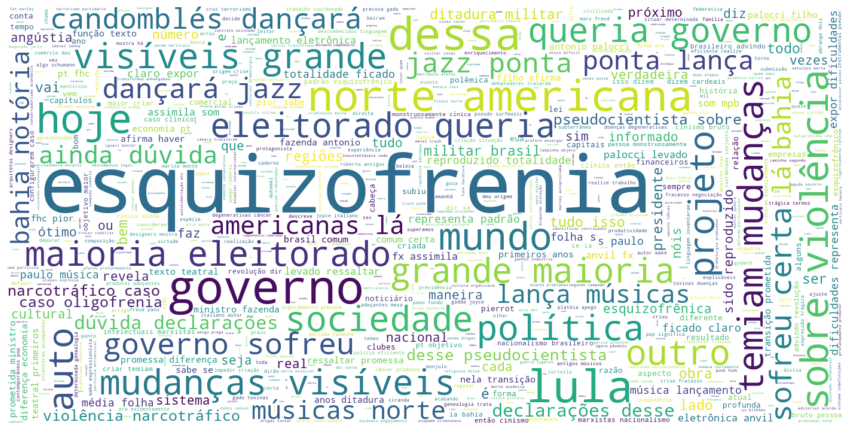

In [9]:
from wordcloud import WordCloud
df[df.label == 1].frases

wc = WordCloud(background_color='white', max_words=1000, width=1400, height=700)

wc.generate(' '.join(df[df.label == 1].frases))
print("As 1000 palavras mais vistas nos contextos metafóricos")
plt.figure(figsize=(15,15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

As 1000 palavras mais vistas nos contextos não metafóricos


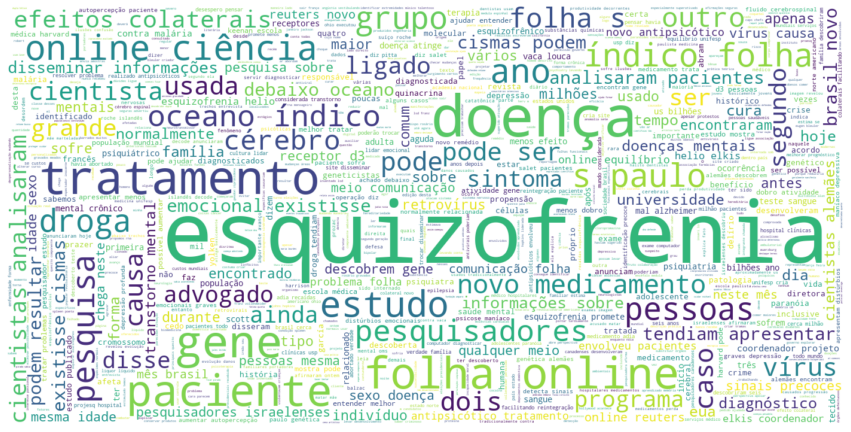

In [10]:
wc2 = WordCloud(background_color='white', max_words=1000, width=1400, height=700)

wc2.generate(' '.join(df[df.label == 0].frases))
print("As 1000 palavras mais vistas nos contextos não metafóricos")
plt.figure(figsize=(15,15))
plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [11]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Acer\anaconda3\envs\tensor\lib\site-packages\tensorflow\python\f

In [37]:
max_length = 32
embedding_dim = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 140

In [62]:
from keras.backend import clear_session
clear_session()

In [63]:
from sklearn.model_selection import train_test_split

samples = df.shape[0]
indices = np.arange(samples)

X_train, X_test, y_train, y_test, idx1, idx2 = train_test_split(df.iloc[:,0], df.iloc[:,1],indices, test_size=0.3)

In [64]:
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index # quais palavras são contadas

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)


In [65]:
training_padded = np.array(training_padded)
training_labels = np.array(y_train)
testing_padded = np.array(testing_padded)
testing_labels = np.array(y_test)

In [66]:
vocab_size = len(word_index)
vocab_size

1494

In [67]:
from keras.models import Sequential
from keras import layers
import tensorflow as tf
from tensorflow.keras.layers import LSTM

In [68]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=8,
    verbose=1,
    restore_best_weights=True,
)

In [69]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size+1, embedding_dim, input_length=max_length),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences = True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [70]:
optimizer = tf.keras.optimizers.Adam()
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 100)           149500    
_________________________________________________________________
dropout (Dropout)            (None, 32, 100)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 32, 128)           84480     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 128)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 32, 64)            41216     
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 256)               1

In [72]:
epochs = 50
history = model.fit(training_padded, training_labels, 
                    batch_size = 32, epochs = epochs, 
                    validation_data=(testing_padded,testing_labels), 
                    callbacks = [callback])

Train on 138 samples, validate on 60 samples
Epoch 1/50
138/138 [==============================] - 3s 21ms/sample - loss: 0.6876 - acc: 0.6232 - val_loss: 0.6588 - val_acc: 0.7667
Epoch 2/50
138/138 [==============================] - 0s 3ms/sample - loss: 0.6549 - acc: 0.6667 - val_loss: 0.5780 - val_acc: 0.7667
Epoch 3/50
138/138 [==============================] - 0s 3ms/sample - loss: 0.5734 - acc: 0.6667 - val_loss: 0.4574 - val_acc: 0.7667
Epoch 4/50
138/138 [==============================] - 0s 4ms/sample - loss: 0.4067 - acc: 0.6667 - val_loss: 0.3659 - val_acc: 0.7667
Epoch 5/50
138/138 [==============================] - 0s 3ms/sample - loss: 0.2401 - acc: 0.7464 - val_loss: 0.3189 - val_acc: 0.9167
Epoch 6/50
138/138 [==============================] - 0s 3ms/sample - loss: 0.1694 - acc: 1.0000 - val_loss: 0.3132 - val_acc: 0.9333
Epoch 7/50
138/138 [==============================] - 0s 3ms/sample - loss: 0.0633 - acc: 1.0000 - val_loss: 0.3900 - val_acc: 0.9000
Epoch 8/50
138/1

In [73]:
metrics = pd.DataFrame(history.history)
metrics

,loss,acc,val_loss,val_acc
0,6.876424e-01,0.623188,0.658756,0.766667
1,6.548895e-01,0.666667,0.577956,0.766667
2,5.734329e-01,0.666667,0.457402,0.766667
3,4.066762e-01,0.666667,0.365931,0.766667
4,2.400802e-01,0.746377,0.318861,0.916667
5,1.694042e-01,1.000000,0.313163,0.933333
6,6.328650e-02,1.000000,0.390016,0.900000
7,7.361727e-03,1.000000,0.695383,0.883333
8,2.344628e-04,1.000000,1.168864,0.816667
9,4.110076e-05,1.000000,1.684155,0.800000


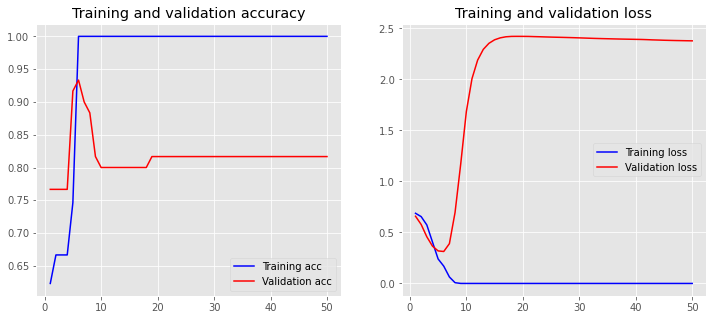

In [74]:
plot_history(history)

In [75]:
loss, accuracy = model.evaluate(testing_padded, testing_labels, verbose=False)
print(loss)
print(accuracy)

2.3776749928792316
0.81666666


In [76]:
from sklearn.metrics import confusion_matrix, classification_report

In [77]:
y_pred = model.predict_classes(testing_padded)

In [78]:
y_pred2=[]
for i in y_pred:
    y_pred2.extend(i)
    
y_pred2;

In [79]:
print(confusion_matrix(y_test, y_pred2))

[[36 10]
 [ 1 13]]


$$
\left[ \begin{array}{cc}
        TP & FP\\
        FN & TN 
        \end{array}
\right]
$$


In [80]:
print(classification_report(y_test,  y_pred))

              precision    recall  f1-score   support

           0       0.97      0.78      0.87        46
           1       0.57      0.93      0.70        14

    accuracy                           0.82        60
   macro avg       0.77      0.86      0.79        60
weighted avg       0.88      0.82      0.83        60



In [81]:
erros = (y_pred2 - y_test.values)
erros

array([ 0,  0,  1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  0,  1,
        0,  0,  0,  0,  0,  0,  0,  1,  0], dtype=int64)

In [82]:
# falsos positivos
falso_positivo = np.where(erros == 1)
falso_positivo

(array([ 2, 17, 18, 21, 27, 42, 43, 48, 50, 58], dtype=int64),)

In [83]:
# falsos negativos 
falso_negativo = np.where(erros == -1)
falso_negativo

(array([7], dtype=int64),)

In [84]:
falsos_positivos = []
for i in falso_positivo:
    falsos_positivos.extend(df.iloc[idx2[i],0])

falsos_positivos

['disse policial investiga caso. thara srinivasan, diretora fundação amparo pesquisa esquizofrenia índia, disse acreditar maioria pacientes esquizofrênica abandonados famílias. disse disse policial investiga caso. thara srinivasan, diretora fundação amparo pesquisa',
 'substituir órgãos defeituosos tecidos produzidos engenharia genética projetar terapias personalizadas esquizofrenia depressão. previsão feita hoje linda g. griffth, instituto tecnologia substituir órgãos defeituosos tecidos produzidos engenharia genética projetar terapias personalizadas',
 'ensanguentado casa. polícia determinou necropsia conhecer causas exatas morte. rapaz esquizofrênico apontado autor crime, embora ainda prestado depoimento causa crises ensanguentado casa. polícia determinou necropsia conhecer causas exatas morte. rapaz',
 '"ler delírio", acaba sair frança, faz estudo contundente sobre tratamento esquizofrenia século opôs escritores balzac médicos alienistas freud costumava comparar "ler delírio", acab

In [85]:
falsos_negativos = []
for i in falso_negativo:
    falsos_negativos.extend(df.iloc[idx2[i],0])

falsos_negativos

['engordamento precoce gado. toxinas. doenças degenerativas. câncer. produtos adoçantes mesa. esquizofrenia diet. paranóia colesterol. supermercado convertido templo consumo. nutrição videogame. engordamento precoce gado. toxinas. doenças degenerativas. câncer. produtos adoçantes mesa.']